In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 100 
mu = 0
tau = 1.0
h = 0.01
steps = 1000

rng = np.random.default_rng()

In [2]:
def generate_J(N, mu, sigma):
    J = np.random.normal(mu, sigma, (N, N))
    np.fill_diagonal(J, 0)
    return J


def phi(x):
    """Transfer function as defined under equation (1)"""
    return np.tanh(x)

def dr_dt(r, J, tau): #equation 1 in the paper 
    drdt = (-r + np.dot(J, phi(r))) / tau
    return drdt


def runge_kutta(x, J, tau):
    """4th order Runge-Kutta implemntation, returns x_n+1 from x."""
    k1 = h * dr_dt(x, J, tau)
    k2 = h * dr_dt(x + k1 / 2, J, tau)
    k3 = h * dr_dt(x + k2 / 2, J, tau)
    k4 = h * dr_dt(x + k3, J, tau)
    x_new = x + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return x_new

In [3]:
def run_simulation(N, steps, tau, mu, g):
    """Runs a simulation for steps evolving it over the 4th order Runge-Kutta implementation.
    Returns an normalised behaviour of all neurons in the system."""
    sigma = g / np.sqrt(N)
    x = np.random.uniform(-0.01, 0.01, N)
    J = generate_J(N, mu, sigma)
    x_norm = np.zeros(steps)

    for i in range(steps):
        x = runge_kutta(x, J, tau)
        x_norm[i] = np.linalg.norm(x)
    return x_norm


def variable_g_sim(g_arr, N, steps, tau, mu):
    """Applies the simulation to variable g. Takes same variables as run_simulation."""
    x_norm_arr = np.zeros((len(g_arr), steps))
    for j, g in enumerate(g_arr):
        x_norm_arr[j, :] = run_simulation(N, steps, tau, mu, g)
    return x_norm_arr

[[5.80442581e-02 5.74667081e-02 5.68949048e-02 ... 2.71545919e-06
  2.68843992e-06 2.66168950e-06]
 [5.88017419e-02 5.82102977e-02 5.76248655e-02 ... 4.21327571e-06
  4.17475196e-06 4.13658199e-06]
 [5.42822706e-02 5.37570489e-02 5.32370843e-02 ... 9.43421142e-06
  9.35758130e-06 9.28157633e-06]
 ...
 [5.87494268e-02 5.82515825e-02 5.83458984e-02 ... 8.58227620e+01
  8.58530285e+01 8.58821682e+01]
 [5.91425831e-02 5.87030186e-02 5.89879627e-02 ... 7.58584861e+01
  7.58303009e+01 7.58027574e+01]
 [5.68406024e-02 5.62556254e-02 5.62634980e-02 ... 9.05430365e+01
  9.05465228e+01 9.05508064e+01]]
(100,) (100, 1000)


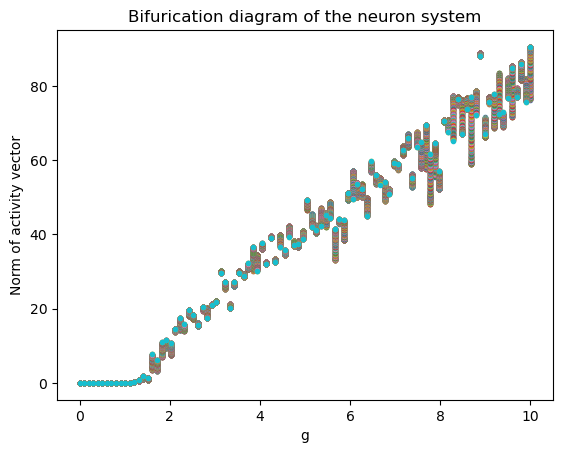

In [4]:
g_arr = np.linspace(0.0, 10.0, 100)

x_norm_arr = variable_g_sim(g_arr, N, steps, tau, mu)
print(x_norm_arr)

def plot_time_vs_xnorm(g_arr, x_norm_arr):
    """Plots the time vs the xnorm; xnorm being the average activity over all the neurons. """
    for j in range(len(g_arr)):
        plt.plot(x_norm_arr[j], label=f"g = {g_arr[j]}")
    plt.legend()
    plt.xlabel("Time steps")
    plt.ylabel("Norm of activity vector")
    plt.title("Neural Network Dynamics for Different g")
    #plt.savefig("exc1.png")
    plt.show()

def plot_g_vs_norm(g_arr, x_norm_arr, steps):
    print(g_arr.shape, x_norm_arr.shape)
    plt.plot(g_arr, (x_norm_arr[:, int(0.8*steps):]), marker = ".", linestyle = "None")
    plt.title("Bifurication diagram of the neuron system")
    plt.xlabel("g")
    plt.ylabel("Norm of activity vector")
    plt.savefig("exc1-biff.png")
    plt.show()

plot_g_vs_norm(g_arr, x_norm_arr, steps)